In [587]:
# Need to prepare the news headlines in the same way as the training data
# Load the news headlines
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

stock = "MRK"

        
def preprocess(input_series):
    result_series = input_series.copy()
    
    # Apply preprocessing steps to the series
    result_series = result_series.str.lower()  # Convert to lowercase
    result_series = result_series.str.replace("[^\w\s]", "", regex=True)  # Remove punctuation marks
    result_series = result_series.str.replace("\d+", "", regex=True)  # Remove numbers
    result_series = result_series.str.replace("\s+", " ", regex=True)  # Replace newlines and multiple spaces with a single space

    return result_series

In [588]:
data = pd.read_csv('raw_analyst_ratings.csv')
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [589]:
# Get the 50 most stock with the most amount of datee
data['stock'].value_counts().head(50)

stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
NFLX    3028
M       3025
EBAY    3018
GILD    2968
VZ      2966
QCOM    2941
JNJ     2928
DAL     2926
BABA    2858
KO      2797
AA      2739
EWU     2702
ORCL    2701
FDX     2629
HD      2612
WFC     2612
BBRY    2580
BMY     2528
JCP     2516
LLY     2417
AGN     2408
CMG     2370
EWJ     2362
CAT     2322
GPRO    2303
TWX     2279
CHK     2246
GLD     2236
P       2234
LMT     2228
MCD     2228
FSLR    2222
NOK     2217
EA      2169
FCX     2162
MA      2152
PEP     2141
GPS     2127
XLF     2114
GRPN    2093
TM      2055
EWP     2027
HAL     2017
LOW     2013
ADBE    1999
Name: count, dtype: int64

In [590]:
# Im going to use the MS stock as it has a lot of dates
news_data = data[data['stock'] == stock]

news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
846406,850715,Shares of several healthcare companies are tra...,https://www.benzinga.com/wiim/20/06/16233278/s...,Benzinga Newsdesk,2020-06-11 10:22:31-04:00,MRK
846407,850716,Johnson & Johnson To Start Coronavirus Vaccine...,https://www.benzinga.com/general/biotech/20/06...,Neer Varshney,2020-06-11 00:16:21-04:00,MRK
846408,850717,The Daily Biotech Pulse: Keytruda Setback For ...,https://www.benzinga.com/general/biotech/20/06...,Shanthi Rexaline,2020-06-10 07:30:59-04:00,MRK
846409,850718,Merck Announces That The Phase 3 KEYNOTE-361 T...,https://www.benzinga.com/news/20/06/16216257/m...,Benzinga Newsdesk,2020-06-09 16:13:02-04:00,MRK
846410,850719,"The Week Ahead In Biotech: Viela FDA Decision,...",https://www.benzinga.com/general/biotech/20/06...,Shanthi Rexaline,2020-06-07 13:43:52-04:00,MRK


In [591]:
news_data.shape

(3333, 6)

In [592]:
# Get the date range
print(news_data['date'].min())
print(news_data['date'].max())

2009-07-27 00:00:00
2020-06-11 10:22:31-04:00


In [593]:
# Get the top ten stocks with the most amount of unique dates
top_stocks = data.groupby('stock')['date'].nunique().sort_values(ascending=False).head(10)
print(top_stocks)

stock
MRK     1615
KO      1407
MS      1392
JNJ     1378
DAL     1357
GILD    1335
VZ      1315
M       1298
BMY     1288
GLD     1224
Name: date, dtype: int64


<Axes: title={'center': 'Top 10 Stocks with the Most Amount of Unique Dates'}, xlabel='stock'>

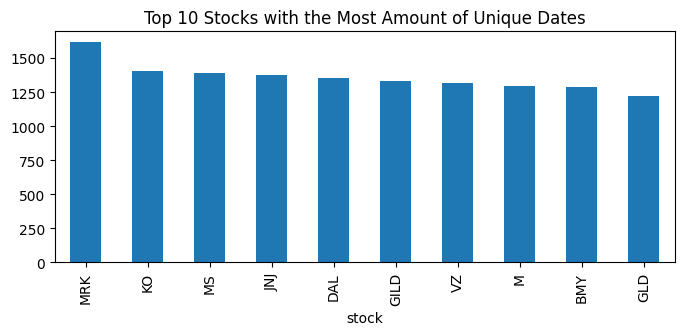

In [623]:
# graph the top ten stocks with the most amount of unique dates
top_stocks.plot(kind='bar', title='Top 10 Stocks with the Most Amount of Unique Dates', figsize=(8, 3))


In [594]:
news_data

,Unnamed: 0,headline,url,publisher,date,stock
846406,850715,Shares of several healthcare companies are tra...,https://www.benzinga.com/wiim/20/06/16233278/s...,Benzinga Newsdesk,2020-06-11 10:22:31-04:00,MRK
846407,850716,Johnson & Johnson To Start Coronavirus Vaccine...,https://www.benzinga.com/general/biotech/20/06...,Neer Varshney,2020-06-11 00:16:21-04:00,MRK
846408,850717,The Daily Biotech Pulse: Keytruda Setback For ...,https://www.benzinga.com/general/biotech/20/06...,Shanthi Rexaline,2020-06-10 07:30:59-04:00,MRK
846409,850718,Merck Announces That The Phase 3 KEYNOTE-361 T...,https://www.benzinga.com/news/20/06/16216257/m...,Benzinga Newsdesk,2020-06-09 16:13:02-04:00,MRK
846410,850719,"The Week Ahead In Biotech: Viela FDA Decision,...",https://www.benzinga.com/general/biotech/20/06...,Shanthi Rexaline,2020-06-07 13:43:52-04:00,MRK
...,...,...,...,...,...,...
849734,854067,"Fitch Downgrades Merck, Outlook Stable",https://www.benzinga.com/markets/analyst-resea...,Benzinga Staff,2009-11-04 00:00:00,MRK
849735,854068,Sanofi-aventis (SNY) Completes Acquisition of ...,https://www.benzinga.com/benzingastaff1/2009/9...,BenzingaStaff1,2009-09-18 00:00:00,MRK
849736,854071,ParagonReport.com Complimentary Market Update ...,https://www.benzinga.com/09/08/1612/paragonrep...,Benzinga Staff,2009-08-10 00:00:00,MRK
849737,854072,ParagonReport.com Complimentary Market Update ...,https://www.benzinga.com/09/08/675/paragonrepo...,Benzinga Staff,2009-08-07 00:00:00,MRK


In [595]:
# Apply the preprocessing function to the news headlines
news_data['headline'] = preprocess(news_data['headline'])

In [596]:
news_data

,Unnamed: 0,headline,url,publisher,date,stock
846406,850715,shares of several healthcare companies are tra...,https://www.benzinga.com/wiim/20/06/16233278/s...,Benzinga Newsdesk,2020-06-11 10:22:31-04:00,MRK
846407,850716,johnson johnson to start coronavirus vaccine h...,https://www.benzinga.com/general/biotech/20/06...,Neer Varshney,2020-06-11 00:16:21-04:00,MRK
846408,850717,the daily biotech pulse keytruda setback for m...,https://www.benzinga.com/general/biotech/20/06...,Shanthi Rexaline,2020-06-10 07:30:59-04:00,MRK
846409,850718,merck announces that the phase keynote trial e...,https://www.benzinga.com/news/20/06/16216257/m...,Benzinga Newsdesk,2020-06-09 16:13:02-04:00,MRK
846410,850719,the week ahead in biotech viela fda decision h...,https://www.benzinga.com/general/biotech/20/06...,Shanthi Rexaline,2020-06-07 13:43:52-04:00,MRK
...,...,...,...,...,...,...
849734,854067,fitch downgrades merck outlook stable,https://www.benzinga.com/markets/analyst-resea...,Benzinga Staff,2009-11-04 00:00:00,MRK
849735,854068,sanofiaventis sny completes acquisition of merial,https://www.benzinga.com/benzingastaff1/2009/9...,BenzingaStaff1,2009-09-18 00:00:00,MRK
849736,854071,paragonreportcom complimentary market update o...,https://www.benzinga.com/09/08/1612/paragonrep...,Benzinga Staff,2009-08-10 00:00:00,MRK
849737,854072,paragonreportcom complimentary market update o...,https://www.benzinga.com/09/08/675/paragonrepo...,Benzinga Staff,2009-08-07 00:00:00,MRK


In [597]:
# Load the historical financial data
stock_data = pd.read_csv(f'stock_data/{stock}_historical_data.csv')

stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-07-27,29.694656,29.751907,29.026718,29.360687,17.994921,21026758
1,2009-07-28,29.303434,29.494274,28.406488,28.645039,17.556303,23627265
2,2009-07-29,28.635496,28.759542,28.158398,28.501907,17.468576,16696736
3,2009-07-30,28.826336,29.551527,28.511450,28.568703,17.509518,24300290
4,2009-07-31,28.816793,29.179390,28.540075,28.635496,17.550451,16269362


In [598]:
import os
import pickle
import torch
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from rich.progress import track
from tqdm import tqdm

merged_df = None

nltk.download('vader_lexicon')

class FinbertClassifier(BaseEstimator, TransformerMixin):
    def __init__(self, model_path="ProsusAI/finbert"):
        self.tokenizer = AutoTokenizer.from_pretrained(model_path)
        self.model = AutoModelForSequenceClassification.from_pretrained(model_path)

    def predict(self, texts):
        inputs = self.tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
        with torch.no_grad():
            outputs = self.model(**inputs)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        return predictions.numpy()

# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# List all of the models in the models directory
available_models = os.listdir('models')

data_directory = 'news_data_with_sentiment'
file_path = os.path.join(data_directory, f'{stock}_data_with_sentiment.csv')

if os.path.exists(file_path):
    # If the file exists, load the DataFrame
    news_data = pd.read_csv(file_path)
else:
    # If the file doesn't exist, run through the models to create it
    for model_name in tqdm(available_models, desc="Processing models..."):
        # Load the model
        model = pickle.load(open(f'models/{model_name}', 'rb'))
        # Predict the sentiment 
        model_key = f'Sentiment_{model_name.split("_pipeline")[0]}'
        headlines_list = news_data['headline'].tolist()  # Ensure the input is a list of strings

        if isinstance(model, FinbertClassifier) or isinstance(model, Pipeline):
            # Use predict method for FinbertClassifier or Pipeline
            news_data[model_key] = model.predict(headlines_list)
        else:
            # Other model types (if any) can be handled here
            news_data[model_key] = model.predict(headlines_list)

    news_data['Sentiment_VADER'] = [(vader.polarity_scores(headline)['compound'] + 1) / 2 for headline in news_data['headline']]
    
    
    news_data.to_csv(file_path, index=False)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/calnan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [599]:
# Remove the pipeline suffix from the model names and add a Sentiment_ prefix
available_models = [f"Sentiment_{model_name.split('_pipeline')[0]}" for model_name in available_models]

In [600]:
news_data['Sentiment_Random'] = np.random.randint(2, size=len(news_data))

# # Add it to the available models list
available_models.append('Sentiment_Random')

In [601]:
available_models

['Sentiment_DecisionTreeClassifier',
 'Sentiment_finbert',
 'Sentiment_LogisticRegression',
 'Sentiment_KNeighborsClassifier',
 'Sentiment_MultinomialNB',
 'Sentiment_SGDClassifier',
 'Sentiment_GradientBoostingClassifier',
 'Sentiment_XGBClassifier',
 'Sentiment_RandomForestClassifier',
 'Sentiment_Random']

In [602]:
# Initialize a dictionary to hold the counts
model_counts_dict = {}

for model in available_models:
    # Store the value counts in the dictionary
    model_counts_dict[model] = news_data[model].value_counts()

# Convert the dictionary to a DataFrame
model_sentiment_counts = pd.DataFrame(model_counts_dict)

# Transpose the DataFrame to have models as rows and sentiment values as columns
model_sentiment_counts = model_sentiment_counts.T

# Fill NaN values with 0, in case some sentiment values are missing in some models
model_sentiment_counts = model_sentiment_counts.fillna(0)

# Display the DataFrame
model_sentiment_counts


,0,1,2
Sentiment_DecisionTreeClassifier,121.0,3212.0,0.0
Sentiment_finbert,999.0,518.0,1816.0
Sentiment_LogisticRegression,427.0,2906.0,0.0
Sentiment_KNeighborsClassifier,224.0,3109.0,0.0
Sentiment_MultinomialNB,757.0,2576.0,0.0
Sentiment_SGDClassifier,609.0,2724.0,0.0
Sentiment_GradientBoostingClassifier,141.0,3192.0,0.0
Sentiment_XGBClassifier,201.0,3132.0,0.0
Sentiment_RandomForestClassifier,202.0,3131.0,0.0
Sentiment_Random,1629.0,1704.0,0.0


In [603]:
news_data['date'] = news_data['date'].str.split(' ').str[0]

news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,Sentiment_DecisionTreeClassifier,Sentiment_finbert,Sentiment_LogisticRegression,Sentiment_KNeighborsClassifier,Sentiment_MultinomialNB,Sentiment_SGDClassifier,Sentiment_GradientBoostingClassifier,Sentiment_XGBClassifier,Sentiment_RandomForestClassifier,Sentiment_VADER,Sentiment_Random
0,850715,shares of several healthcare companies are tra...,https://www.benzinga.com/wiim/20/06/16233278/s...,Benzinga Newsdesk,2020-06-11,MRK,0,1,1,1,1,0,0,1,1,0.79295,0
1,850716,johnson johnson to start coronavirus vaccine h...,https://www.benzinga.com/general/biotech/20/06...,Neer Varshney,2020-06-11,MRK,1,2,1,0,1,1,1,1,1,0.50000,1
2,850717,the daily biotech pulse keytruda setback for m...,https://www.benzinga.com/general/biotech/20/06...,Shanthi Rexaline,2020-06-10,MRK,1,1,0,1,0,0,1,1,1,0.68060,0
3,850718,merck announces that the phase keynote trial e...,https://www.benzinga.com/news/20/06/16216257/m...,Benzinga Newsdesk,2020-06-09,MRK,1,0,1,1,1,1,1,1,1,0.62500,0
4,850719,the week ahead in biotech viela fda decision h...,https://www.benzinga.com/general/biotech/20/06...,Shanthi Rexaline,2020-06-07,MRK,1,2,1,1,1,1,1,1,1,0.50000,0


In [604]:
# Convert the 'date' column to datetime and extract the date part
news_data['date'] = pd.to_datetime(news_data['date']).dt.date

daily_sentiments = {}

# Aggregate the sentiment values by date, i.e. if there are multiple headlines for a date, take the most common sentiment value
for model in available_models:
    daily_sentiments[model] = news_data.groupby('date')[model].min()#apply(lambda x: x.mode().iloc[0])

daily_sentiments

{'Sentiment_DecisionTreeClassifier': date
 2009-07-27    1
 2009-08-07    1
 2009-08-10    1
 2009-09-18    1
 2009-11-04    1
              ..
 2020-06-05    1
 2020-06-07    1
 2020-06-09    1
 2020-06-10    1
 2020-06-11    0
 Name: Sentiment_DecisionTreeClassifier, Length: 1611, dtype: int64,
 'Sentiment_finbert': date
 2009-07-27    2
 2009-08-07    2
 2009-08-10    2
 2009-09-18    2
 2009-11-04    1
              ..
 2020-06-05    0
 2020-06-07    2
 2020-06-09    0
 2020-06-10    1
 2020-06-11    1
 Name: Sentiment_finbert, Length: 1611, dtype: int64,
 'Sentiment_LogisticRegression': date
 2009-07-27    1
 2009-08-07    1
 2009-08-10    1
 2009-09-18    1
 2009-11-04    0
              ..
 2020-06-05    1
 2020-06-07    1
 2020-06-09    1
 2020-06-10    0
 2020-06-11    1
 Name: Sentiment_LogisticRegression, Length: 1611, dtype: int64,
 'Sentiment_KNeighborsClassifier': date
 2009-07-27    1
 2009-08-07    1
 2009-08-10    1
 2009-09-18    1
 2009-11-04    1
              ..
 2

In [605]:
# Merge with stock data

# Ensure the stock data's 'Date' column is in the correct format
# stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date

# Remame the date column from average_daily_sentiment to 'Date'
# average_daily_sentiment = average_daily_sentiment.rename(columns={'date': 'Date'})

for model in available_models:
    # Rename the columns to 'Date' and 'Sentiment'
    daily_sentiments[model] = daily_sentiments[model].reset_index().rename(columns={'date': 'Date', model: 'Sentiment'})

# average_daily_sentiment

In [606]:
for model in available_models:
    daily_sentiments[model]['Date'] = pd.to_datetime(daily_sentiments[model]['Date'])

stock_data['Date'] = pd.to_datetime(stock_data['Date'])

all_sentiments = pd.DataFrame()

for model in available_models:
    sentiment_data = daily_sentiments[model].rename(columns={'Sentiment': f'Sentiment_{model.split("_")[1]}'})
    
    if all_sentiments.empty:
        all_sentiments = sentiment_data
    else:
        # Inspect the head of dataframes before merging

        all_sentiments = all_sentiments.merge(sentiment_data, on='Date', how='outer')


merged_df = stock_data.merge(all_sentiments, on='Date', how='left')

# Save the data
merged_df.to_csv(f'stock_data_wtih_features/{stock}_data_with_sentiment.csv', index=False)


In [607]:
merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,Sentiment_DecisionTreeClassifier,Sentiment_finbert,Sentiment_LogisticRegression,Sentiment_KNeighborsClassifier,Sentiment_MultinomialNB,Sentiment_SGDClassifier,Sentiment_GradientBoostingClassifier,Sentiment_XGBClassifier,Sentiment_RandomForestClassifier,Sentiment_Random
0,2009-07-27,29.694656,29.751907,29.026718,29.360687,17.994921,21026758,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2009-07-28,29.303434,29.494274,28.406488,28.645039,17.556303,23627265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-07-29,28.635496,28.759542,28.158398,28.501907,17.468576,16696736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-07-30,28.826336,29.551527,28.511450,28.568703,17.509518,24300290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-07-31,28.816793,29.179390,28.540075,28.635496,17.550451,16269362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,2020-06-04,77.547707,78.396950,77.137405,77.814888,69.658882,9292930,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2734,2020-06-05,78.349236,79.322517,77.757637,78.492363,70.265343,10413347,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2735,2020-06-08,77.433205,79.389313,77.433205,79.103050,70.812035,9956838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2736,2020-06-09,79.379768,79.685112,78.358780,78.492363,70.265343,8846168,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [608]:
nan_count = merged_df["Sentiment_DecisionTreeClassifier"].isna().sum()
nan_count

1278

In [609]:
2738-nan_count

1460

In [610]:
# import pandas as pd

# # Assuming merged_df is your final merged DataFrame

# # Add a another column to the data called 'Sentiment_Random' and fill it with random values either 0 or 1
merged_df['Sentiment_Random'] = np.random.randint(2, size=len(merged_df))

# # Add it to the available models list
available_models.append('Sentiment_Random')

# # Initialize a DataFrame to store correlations
# correlations = pd.DataFrame(columns=['Model', 'Correlation'])

# # Calculate and store correlations for each model
# for model in available_models:
#     correlation = merged_df[['Close', model]].corr().iloc[0, 1]
#     new_row = pd.DataFrame({'Model': [model], 'Correlation': [correlation]})
#     correlations = pd.concat([correlations, new_row], ignore_index=True)

# # Sort the DataFrame by correlation in descending order
# correlations_sorted = correlations.sort_values(by='Correlation', ascending=False)

# # Display the sorted correlations
# correlations_sorted


In [611]:
merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,Sentiment_DecisionTreeClassifier,Sentiment_finbert,Sentiment_LogisticRegression,Sentiment_KNeighborsClassifier,Sentiment_MultinomialNB,Sentiment_SGDClassifier,Sentiment_GradientBoostingClassifier,Sentiment_XGBClassifier,Sentiment_RandomForestClassifier,Sentiment_Random
0,2009-07-27,29.694656,29.751907,29.026718,29.360687,17.994921,21026758,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,2009-07-28,29.303434,29.494274,28.406488,28.645039,17.556303,23627265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2009-07-29,28.635496,28.759542,28.158398,28.501907,17.468576,16696736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2009-07-30,28.826336,29.551527,28.511450,28.568703,17.509518,24300290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2009-07-31,28.816793,29.179390,28.540075,28.635496,17.550451,16269362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,2020-06-04,77.547707,78.396950,77.137405,77.814888,69.658882,9292930,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2734,2020-06-05,78.349236,79.322517,77.757637,78.492363,70.265343,10413347,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2735,2020-06-08,77.433205,79.389313,77.433205,79.103050,70.812035,9956838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2736,2020-06-09,79.379768,79.685112,78.358780,78.492363,70.265343,8846168,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


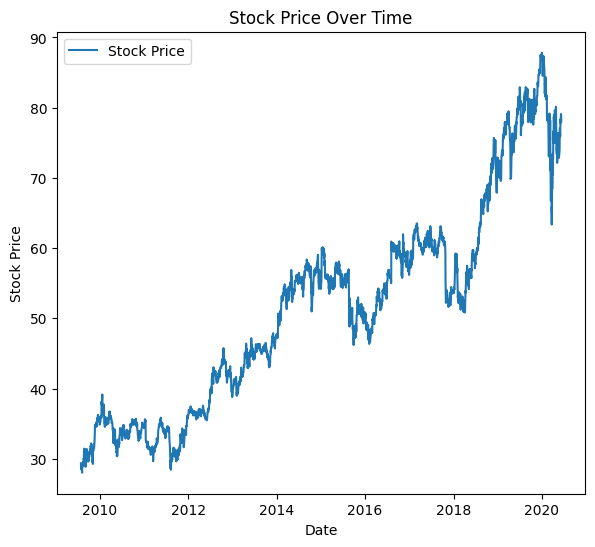

In [612]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(merged_df['Date'], merged_df['Close'], label='Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Over Time')
plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(merged_df['Date'], merged_df['Sentiment'], label='Average Sentiment', color='orange')
# plt.xlabel('Date')
# plt.ylabel('Average Sentiment')
# plt.title('Average Sentiment Over Time')
# plt.legend()

# plt.tight_layout()
plt.savefig(f'results/{stock}/{stock}.png')
plt.show()


In [613]:
# Percentage change in stock price from start to end
stock_price_change = (merged_df['Close'].iloc[-1] - merged_df['Close'].iloc[0]) / merged_df['Close'].iloc[0] * 100
print(f"Stock price change: {stock_price_change:.2f}%")

Stock price change: 165.75%


In [614]:
# import matplotlib.pyplot as plt
# import random

# # Determine the number of models
# num_models = len(available_models)

# # Initialize subplots - two columns for each model, one for portfolio value and one for shares owned
# fig, axes = plt.subplots(nrows=num_models, ncols=2, figsize=(15, 5 * num_models))

# final_portfolio_values = {}
# min_cash_reserve = 500
# # Iterate over each sentiment analysis model and plot data
# for i, model in enumerate(available_models):
#     cash = 10000
#     shares_owned = 0
#     portfolio_values = []
#     shares_history = []

#     sentiment_column = f'Sentiment_{model.split("_")[1]}'
#     # Define transaction cost per trade
#     transaction_cost = 10

#     # Define minimum cash reserve
#     min_cash_reserve = 500

#     # Define maximum percentage of cash to use in a single buy transaction
#     max_cash_percent_for_buy = 0.5

#     # Define percentage of shares to sell
#     sell_percent = 0.1


#     for index, row in merged_df.iterrows():
#         stock_price = row['Close']
#         sentiment = row[f'Sentiment_{model.split("_")[1]}']

#         # if sentiment is nan, skip the action
#         if not np.isnan(sentiment):
#             # Buy strategy: Allocate all available cash to buy shares
#             if model == 'Sentiment_finbert':
#                 if sentiment == 2.0:  # Strong Buy
#                     buy_cash = max(cash - min_cash_reserve, 0)
#             else:
#                 if sentiment == 1.0:  # Buy
#                     buy_cash = max(cash - min_cash_reserve, 0)

#             if buy_cash > 0:
#                 shares_bought = buy_cash // stock_price
#                 cash -= shares_bought * stock_price
#                 shares_owned += shares_bought

#             # Sell strategy: Sell all shares when sentiment is negative
#             if model == 'Sentiment_finbert':
#                 if sentiment == 0.0:  # Strong Sell
#                     cash += shares_owned * stock_price
#                     shares_owned = 0
#             else:
#                 if sentiment == 0.0:  # Sell
#                     cash += shares_owned * stock_price
#                     shares_owned = 0


#         portfolio_value = cash + (shares_owned * stock_price)
#         portfolio_values.append(portfolio_value)
#         shares_history.append(shares_owned)

#     final_portfolio_values[model] = portfolio_value

#     axes[i, 0].plot(merged_df['Date'], portfolio_values, label=f'Portfolio Value - {model}', color='tab:blue')
#     axes[i, 0].set_xlabel('Date')
#     axes[i, 0].set_ylabel('Portfolio Value')
#     axes[i, 0].set_title(f'Portfolio Value Over Time ({model})')
#     axes[i, 0].legend()

#     axes[i, 1].plot(merged_df['Date'], shares_history, label=f'Shares Owned - {model}', color='tab:red')
#     axes[i, 1].set_xlabel('Date')
#     axes[i, 1].set_ylabel('Shares Owned')
#     axes[i, 1].set_title(f'Shares Owned Over Time ({model})')
#     axes[i, 1].legend()

# plt.tight_layout()
# plt.show()


In [615]:
# portfolio_values_df = pd.DataFrame.from_dict(final_portfolio_values, orient='index', columns=['Portfolio Value'])
# portfolio_values_df = portfolio_values_df.sort_values(by='Portfolio Value', ascending=False)
# # Add a column for the percentage change in portfolio value from 10,000
# portfolio_values_df['% Change'] = (portfolio_values_df['Portfolio Value'] - 10000) / 10000 * 100
# stock_price_change = (merged_df['Close'].iloc[-1] - merged_df['Close'].iloc[0]) / merged_df['Close'].iloc[0] * 100
# print(f"Stock price change: {stock_price_change:.2f}%")
# print(portfolio_values_df)

In [616]:

def calculate_model_edge(df):
    # Ensure the Close prices are floats for comparison
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

    sentiment_columns = available_models

    # Dictionary to store correct predictions count for each model
    correct_predictions = {column: 0 for column in sentiment_columns}
    # Dictionary to store total predictions count for each model
    total_predictions = {column: 0 for column in sentiment_columns}

    # Iterate over the dataframe
    for i in range(1, len(df)):
        current_close = df.loc[i, 'Close']
        previous_close = df.loc[i - 1, 'Close']

        for column in available_models:
            sentiment = df.loc[i, column]

            # Skip if NaN
            if pd.isna(sentiment):
                continue

            total_predictions[column] += 1

            # Check for finbert separately
            if column == 'Sentiment_finbert':
                if (sentiment == 0 and current_close < previous_close) or \
                    (sentiment == 2 and current_close > previous_close) or \
                    (sentiment == 1 and 0.9 * previous_close <= current_close <= 1.1 * previous_close):
                        correct_predictions[column] += 1
            else:
                # Check for other models
                if (sentiment == 0 and current_close < previous_close) or (sentiment == 1 and current_close > previous_close):
                    correct_predictions[column] += 1

    # Calculate and return accuracy for each model
    accuracies = {column: correct_predictions[column] / total_predictions[column] if total_predictions[column] > 0 else None for column in sentiment_columns}
    # Put the accuracies in a DataFrame for easier viewing
    accuracies = pd.DataFrame.from_dict(accuracies, orient='index', columns=['Edge']).sort_values(by='Edge', ascending=False)
    return accuracies

edge = calculate_model_edge(merged_df)
edge.to_csv(f'results/{stock}/{stock}_edge.csv')
edge


,Edge
Sentiment_finbert,0.568883
Sentiment_RandomForestClassifier,0.549692
Sentiment_XGBClassifier,0.547635
Sentiment_GradientBoostingClassifier,0.544894
Sentiment_DecisionTreeClassifier,0.540781
Sentiment_LogisticRegression,0.522276
Sentiment_SGDClassifier,0.509938
Sentiment_KNeighborsClassifier,0.507882
Sentiment_MultinomialNB,0.507197
Sentiment_Random,0.495068


Model: Sentiment_DecisionTreeClassifier
ROI: 1.1995240850000009
Sharpe Ratio: 0.03253290894492076
Stock Price Change: 165.74586282671112
Portfolio Value Change: 119.95240850000009
Price vs Portfolio: -45.79345432671103


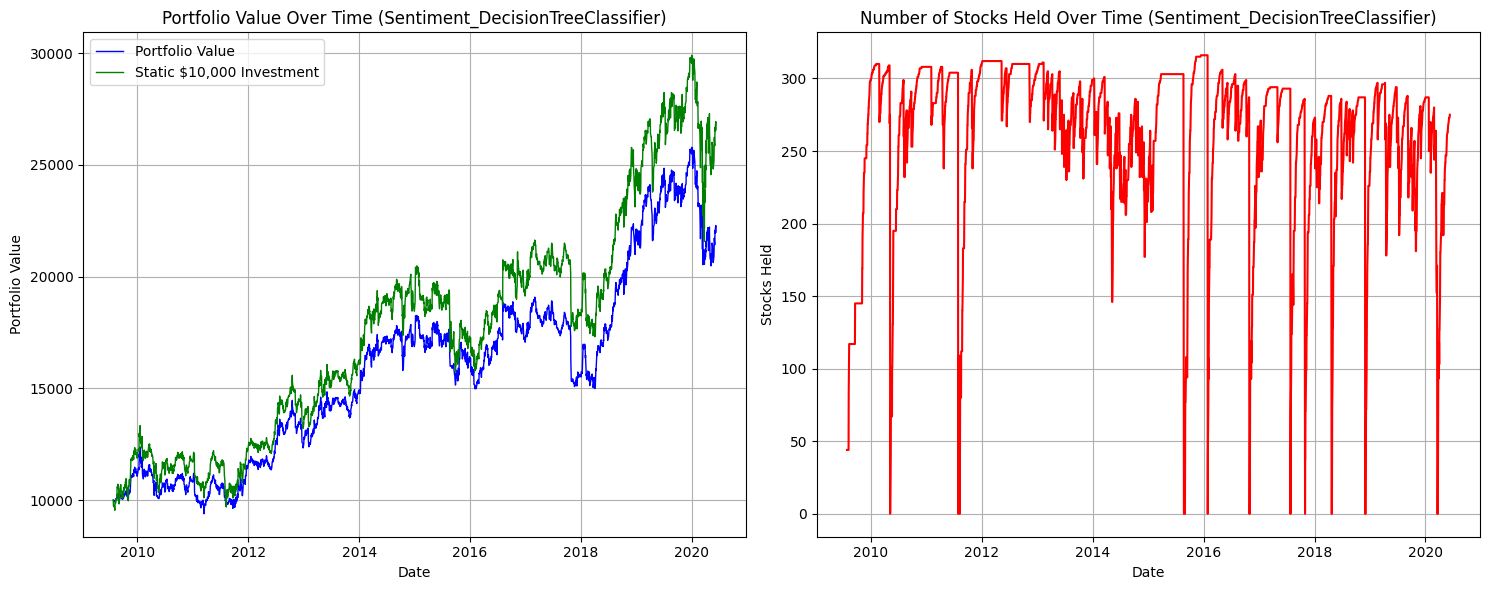

Model: Sentiment_finbert
ROI: 0.838895198899999
Sharpe Ratio: 0.03345244347254825
Stock Price Change: 165.74586282671112
Portfolio Value Change: 83.8895198899999
Price vs Portfolio: -81.85634293671121


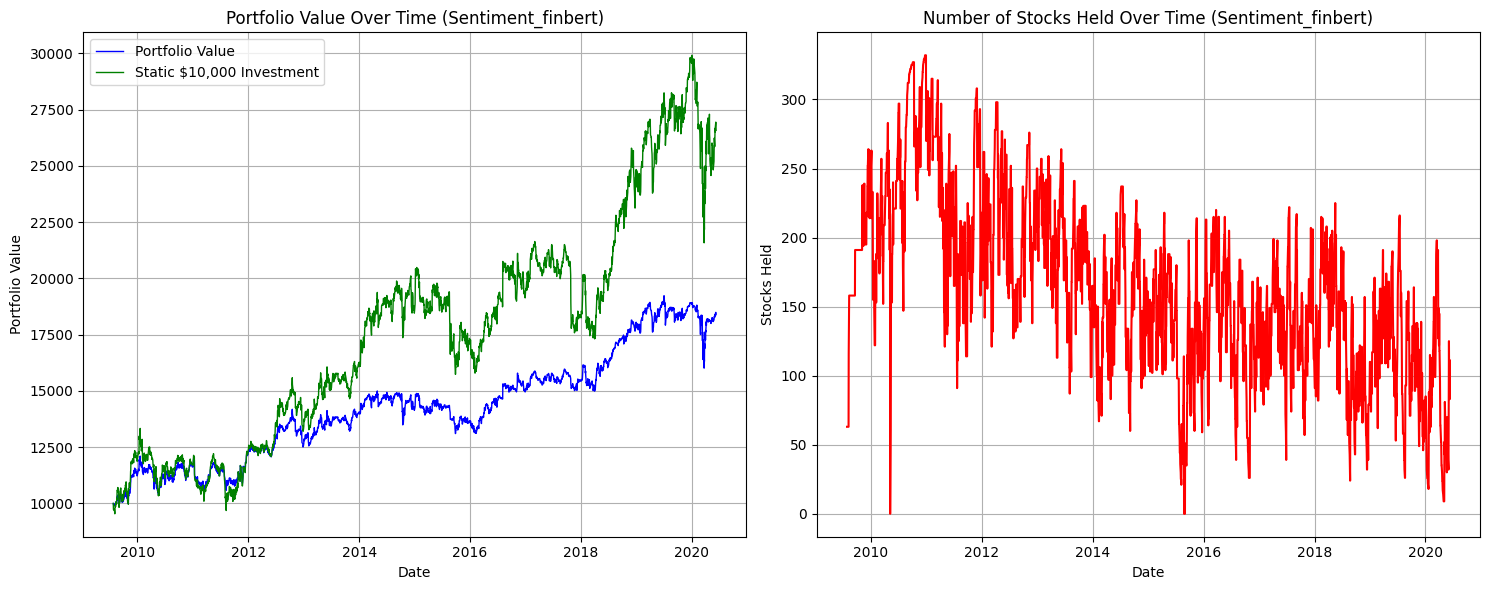

Model: Sentiment_LogisticRegression
ROI: 0.6924752216999986
Sharpe Ratio: 0.025360068641846423
Stock Price Change: 165.74586282671112
Portfolio Value Change: 69.24752216999987
Price vs Portfolio: -96.49834065671125


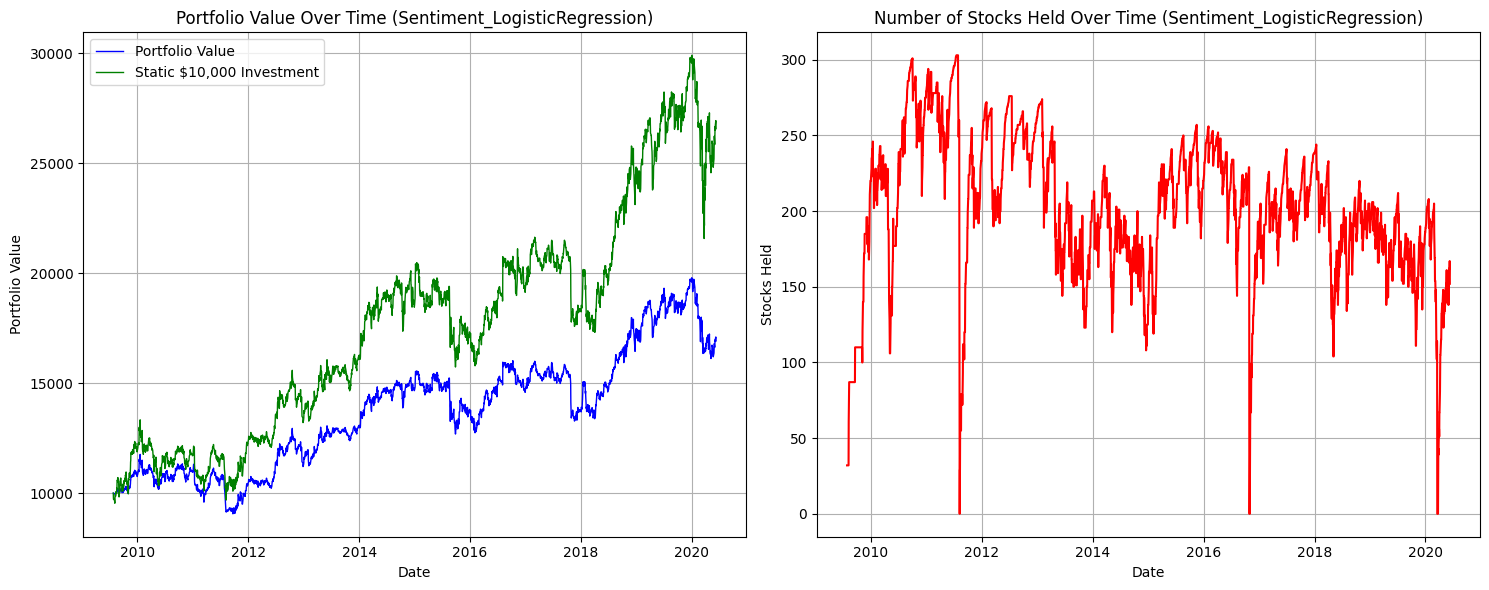

Model: Sentiment_KNeighborsClassifier
ROI: 0.6778826579999994
Sharpe Ratio: 0.024117612354513696
Stock Price Change: 165.74586282671112
Portfolio Value Change: 67.78826579999993
Price vs Portfolio: -97.95759702671118


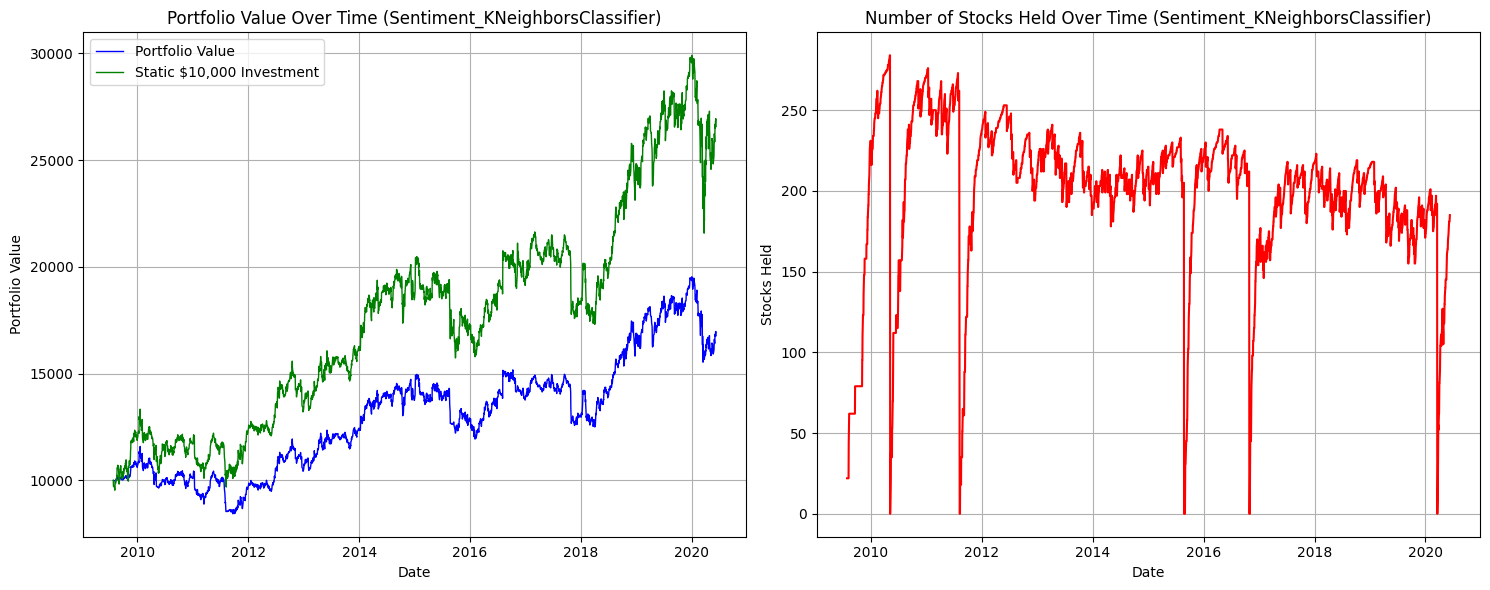

Model: Sentiment_MultinomialNB
ROI: 0.5388196571999996
Sharpe Ratio: 0.02403948377324068
Stock Price Change: 165.74586282671112
Portfolio Value Change: 53.88196571999996
Price vs Portfolio: -111.86389710671116


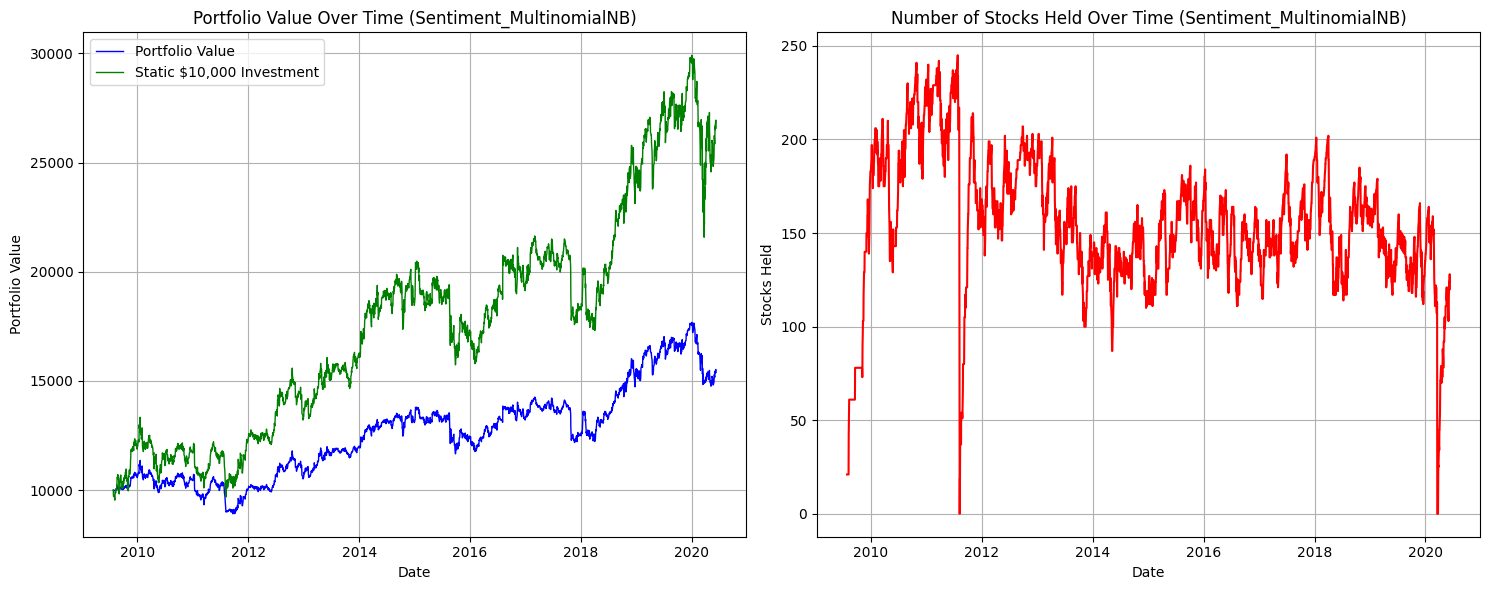

Model: Sentiment_SGDClassifier
ROI: 0.692666999599999
Sharpe Ratio: 0.02720560503274722
Stock Price Change: 165.74586282671112
Portfolio Value Change: 69.2666999599999
Price vs Portfolio: -96.47916286671122


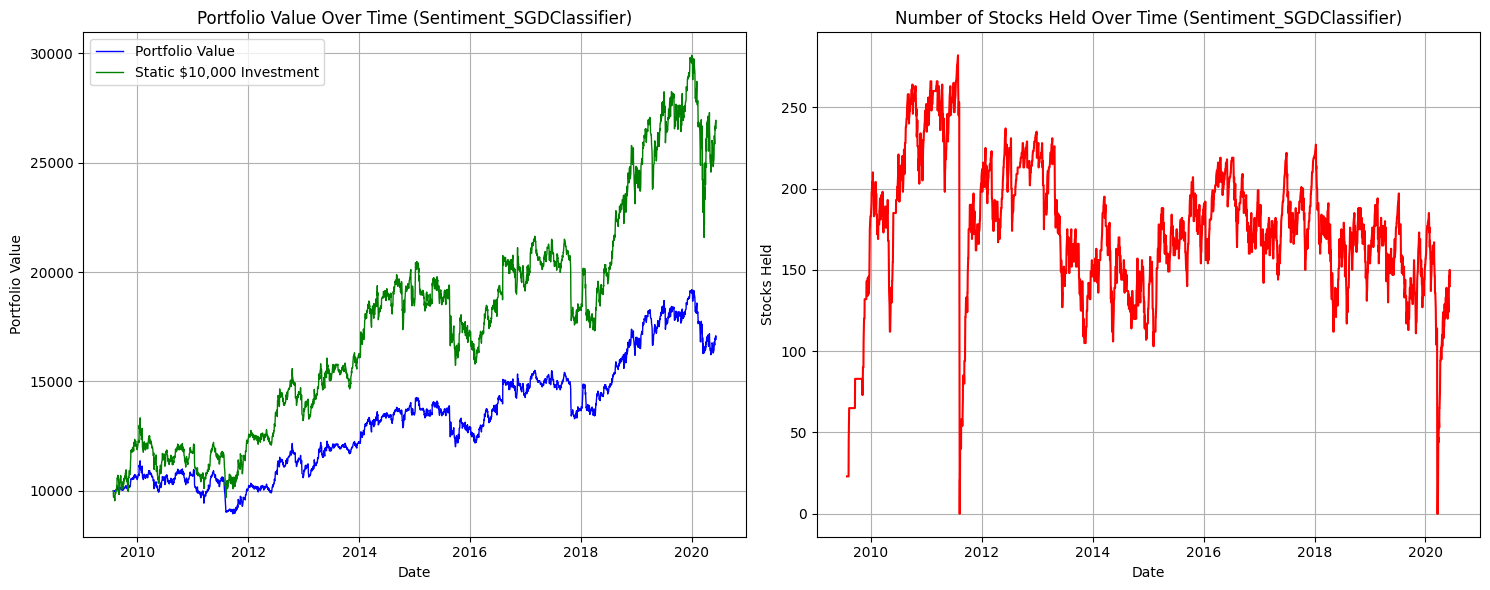

Model: Sentiment_GradientBoostingClassifier
ROI: 1.1226938981000003
Sharpe Ratio: 0.031687082258858634
Stock Price Change: 165.74586282671112
Portfolio Value Change: 112.26938981000004
Price vs Portfolio: -53.47647301671108


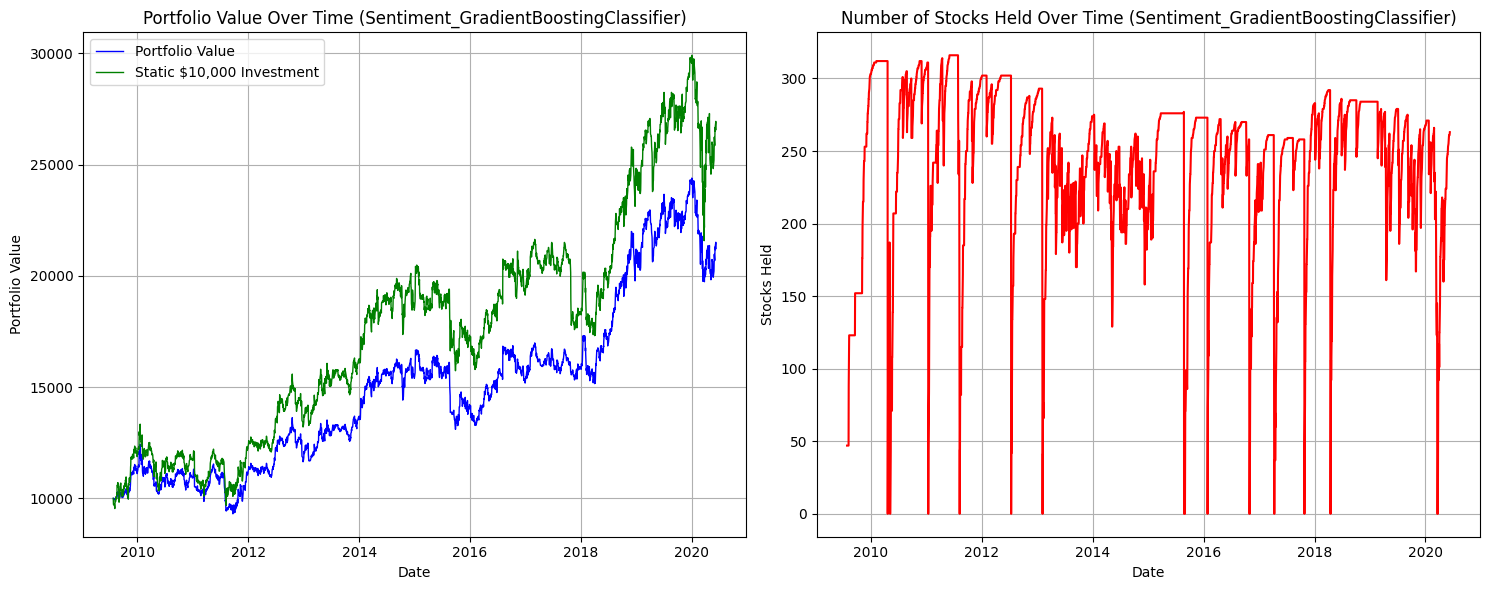

Model: Sentiment_XGBClassifier
ROI: 1.2032827564999988
Sharpe Ratio: 0.03291316116307489
Stock Price Change: 165.74586282671112
Portfolio Value Change: 120.32827564999988
Price vs Portfolio: -45.41758717671124


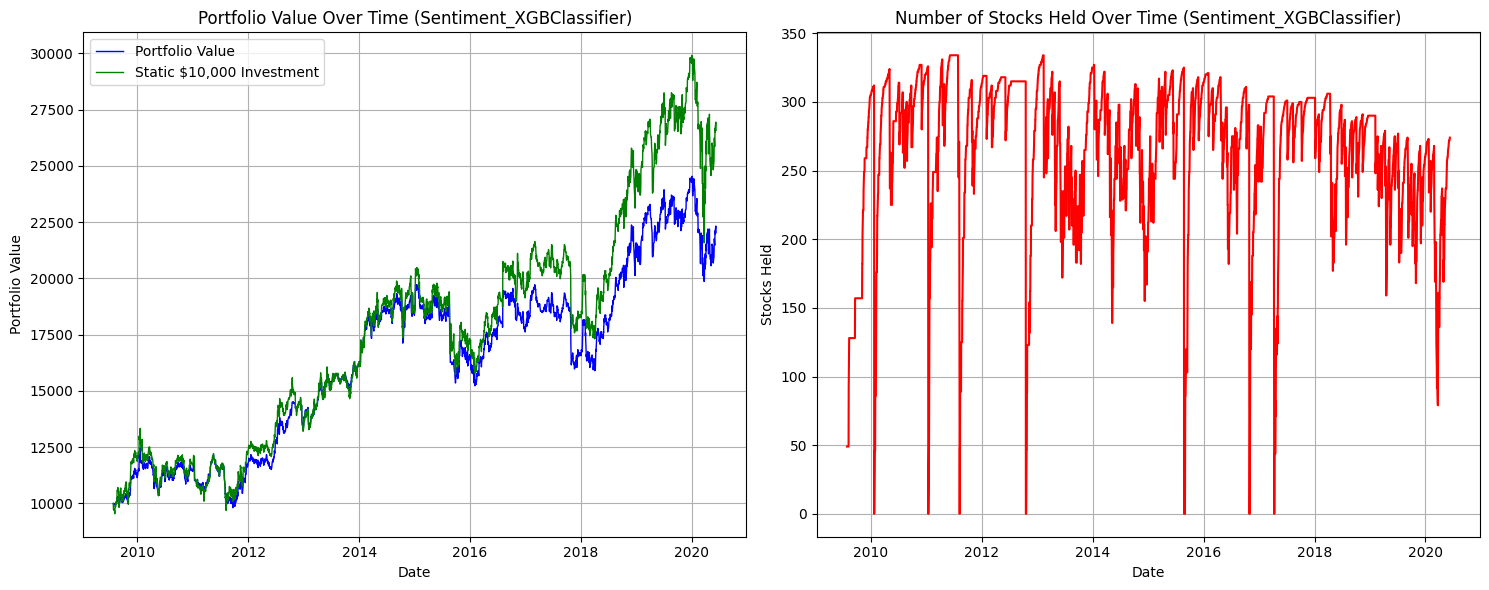

Model: Sentiment_RandomForestClassifier
ROI: 1.1178378865999996
Sharpe Ratio: 0.031882388303533196
Stock Price Change: 165.74586282671112
Portfolio Value Change: 111.78378865999996
Price vs Portfolio: -53.96207416671116


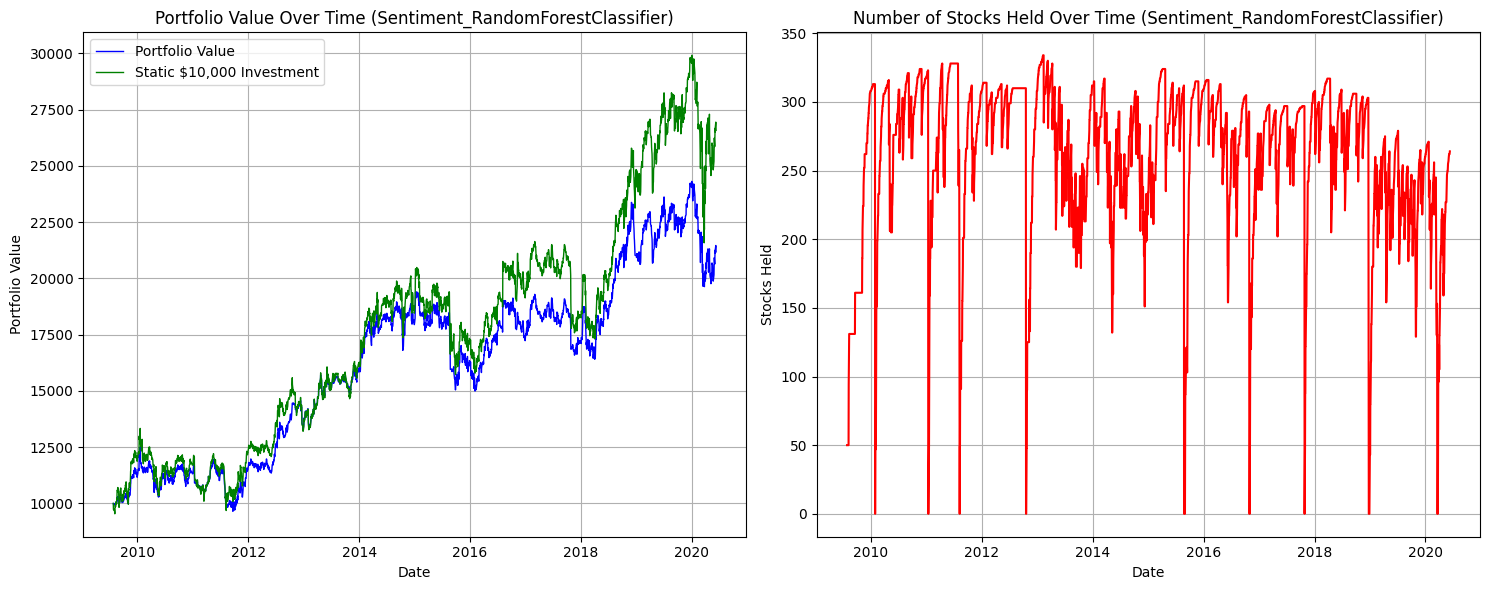

Model: Sentiment_Random
ROI: 0.5622766862999986
Sharpe Ratio: 0.028600886164696603
Stock Price Change: 165.74586282671112
Portfolio Value Change: 56.22766862999986
Price vs Portfolio: -109.51819419671125


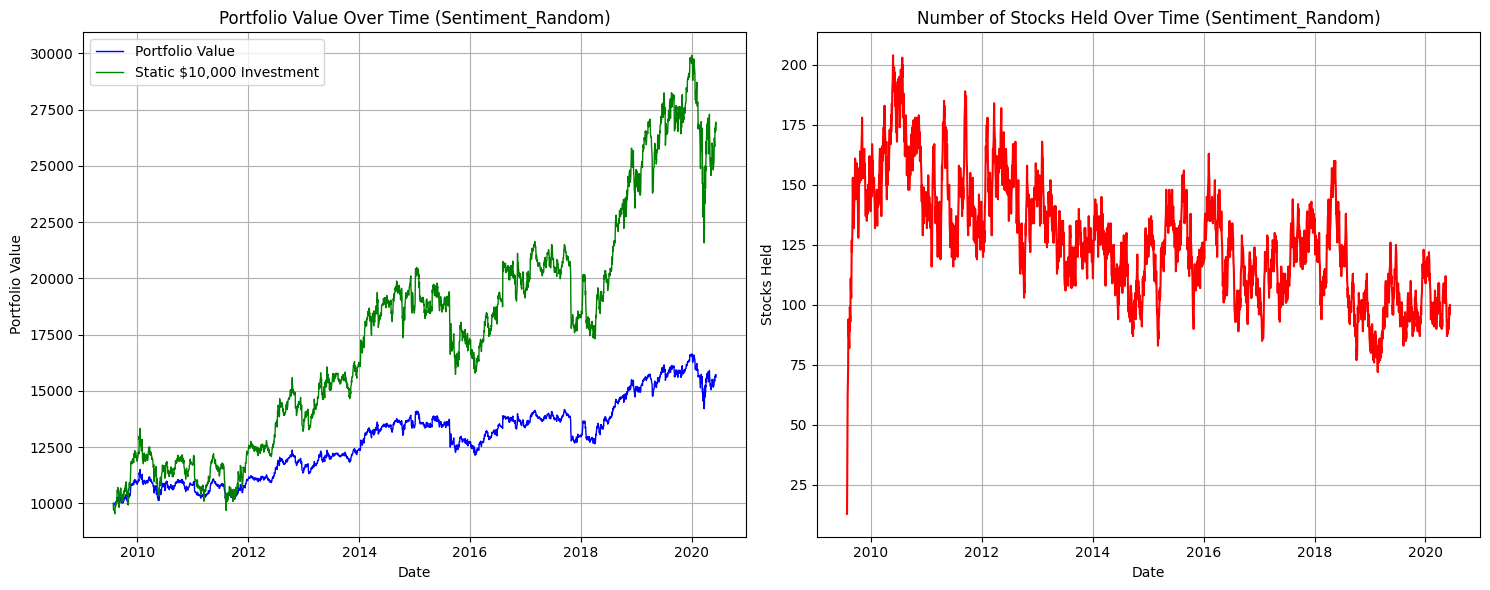

In [617]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

# Assuming 'merged_df' is your DataFrame

# Adjusting finbert sentiment to align with other models
# merged_df['Sentiment_finbert1'] = merged_df['Sentiment_finbert'].replace({2: 1, 0: 1, 1: 0})

# Define action percent
action_percent = 0.5  # 10% of holdings

# List of sentiment columns
sentiment_cols = [col for col in merged_df.columns if 'Sentiment_' in col]

all_results = []

def calculate_position_size(sentiment, model_edge):
    base_size = 0.05  # Base position size (e.g., 5% of portfolio)
    scaling_factor = 2  # Determines how aggressively the position size scales with edge
    position_size = base_size + (model_edge - 0.5) * scaling_factor
    return max(min(position_size, 1), 0)  # Ensure the size is between 0 and 1

def execute_buy_order(stocks_to_buy, current_price, cash, stock, stop_loss_percentage, take_profit_percentage):
    cost = stocks_to_buy * current_price
    if cost <= cash:
        cash -= cost
        stock += stocks_to_buy

        # Setting stop-loss and take-profit levels
        stop_loss = current_price * (1 - stop_loss_percentage)
        take_profit = current_price * (1 + take_profit_percentage)

    return cash, stock, stop_loss, take_profit

def execute_sell_order(stocks_to_sell, current_price, cash, stock):
    revenue = stocks_to_sell * current_price
    cash += revenue
    stock -= stocks_to_sell

    return cash, stock



stop_loss_percentage = 0.05  # 5% below the purchase price
take_profit_percentage = 0.10  # 10% above the purchase price

stock_name = stock

static_investment = [initial_capital * (row['Close'] / merged_df['Close'].iloc[0]) for index, row in merged_df.iterrows()]
# Loop through each sentiment model
for sentiment_col in sentiment_cols:
    initial_capital = 10000  # Starting capital
    cash = initial_capital
    stock = 0
    pnl = []
    no_trade = []
    stocks_held = []  # To track the number of stocks held over time

    stop_loss, take_profit = None, None

    for index, row in merged_df.iterrows():
        current_price = row['Close']
        sentiment = row[sentiment_col]
        position_size = calculate_position_size(sentiment, edge.loc[sentiment_col, 'Edge'])

        # Sell if negative sentiment is detected and we hold stock
        if sentiment < 0.5 and stock > 0:
            stocks_to_sell = int(stock * position_size)
            cash, stock = execute_sell_order(stocks_to_sell, current_price, cash, stock)
            stop_loss, take_profit = None, None  # Resetting stop-loss and take-profit after selling
        # Buy if positive sentiment is detected
        elif sentiment > 0.5:
            stocks_to_buy = int((cash * position_size) / current_price)
            if stocks_to_buy > 0:
                cash, stock, stop_loss, take_profit = execute_buy_order(stocks_to_buy, current_price, cash, stock, stop_loss_percentage, take_profit_percentage)

        # Check if stop-loss or take-profit conditions are met and we hold stock
        if stock > 0 and stop_loss is not None and take_profit is not None:
            if current_price <= stop_loss or current_price >= take_profit:
                cash, stock = execute_sell_order(stock, current_price, cash, stock)
                stop_loss, take_profit = None, None  # Resetting stop-loss and take-profit after selling





        portfolio_value = cash + stock * row['Close']
        no_trade.append(10000*row['Close'])
        pnl.append(portfolio_value)
        stocks_held.append(stock)  # Keep track of stocks held

    # Convert PnL and Stocks Held to a DataFrame
    pnl_df = pd.DataFrame({
        'Date': merged_df['Date'], 
        'Portfolio Value': pnl, 
        'Stocks Held': stocks_held,
        'Static Investment': static_investment  # Add static investment values
    })

    # Calculate performance metrics
    final_portfolio_value = pnl[-1]
    roi = (final_portfolio_value - initial_capital) / initial_capital
    pnl_returns = np.diff(pnl) / pnl[:-1]
    sharpe_ratio = np.mean(pnl_returns) / np.std(pnl_returns) if np.std(pnl_returns) != 0 else 0
    # Percentage increase in stock price from start to end
    stock_price_change = (merged_df['Close'].iloc[-1] - merged_df['Close'].iloc[0]) / merged_df['Close'].iloc[0] * 100
    # Percentage increase in portfolio value from start to end
    portfolio_value_change = (final_portfolio_value - initial_capital) / initial_capital * 100
    # Stock price change vs portfolio value change
    price_vs_portfolio = portfolio_value_change - stock_price_change
    


    # Print performance metrics for the current model
    print(f"Model: {sentiment_col}")
    print("ROI:", roi)
    print("Sharpe Ratio:", sharpe_ratio)
    print("Stock Price Change:", stock_price_change)
    print("Portfolio Value Change:", portfolio_value_change)
    print("Price vs Portfolio:", price_vs_portfolio)
    
    # Append the results to the list
    all_results.append([sentiment_col, roi, sharpe_ratio, stock_price_change, portfolio_value_change, price_vs_portfolio])

    # Plotting the graphs
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), tight_layout=True)

    # Plot for Portfolio Value
    ax1.plot(pnl_df['Date'], pnl_df['Portfolio Value'], color='b', label='Portfolio Value', linewidth=1)
    ax1.plot(pnl_df['Date'], pnl_df['Static Investment'], color='g', label='Static $10,000 Investment', linewidth=1)  # Plot static investment
    ax1.set_title(f'Portfolio Value Over Time ({sentiment_col})')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Portfolio Value')
    ax1.legend()  # Add legend to distinguish the lines
    ax1.grid(True)

    # Plot for Stocks Held
    ax2.plot(pnl_df['Date'], pnl_df['Stocks Held'], linestyle='-', color='r')
    ax2.set_title(f'Number of Stocks Held Over Time ({sentiment_col})')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Stocks Held')
    ax2.grid(True)
    
    plt.savefig(f'results/{stock_name}/{sentiment_col}.png', dpi=300)
    
    plt.show()


# Remove the 'Sentiment_finbert1' column
# merged_df = merged_df.drop(columns=['Sentiment_finbert1'])

In [618]:
# Convert the results to a DataFrame
results_df = pd.DataFrame(all_results, columns=['Model', 'ROI', 'Sharpe Ratio', 'Stock Price Change', 'Portfolio Value Change', 'Price vs Portfolio'])

# Sort the DataFrame by ROI in descending order
results_df = results_df.sort_values(by='ROI', ascending=False)

results_df.to_csv(f'results/{stock_name}/{stock_name}_trading_results.csv', index=False)

# Display the DataFrame
results_df

,Model,ROI,Sharpe Ratio,Stock Price Change,Portfolio Value Change,Price vs Portfolio
7,Sentiment_XGBClassifier,1.203283,0.032913,165.745863,120.328276,-45.417587
0,Sentiment_DecisionTreeClassifier,1.199524,0.032533,165.745863,119.952409,-45.793454
6,Sentiment_GradientBoostingClassifier,1.122694,0.031687,165.745863,112.269390,-53.476473
8,Sentiment_RandomForestClassifier,1.117838,0.031882,165.745863,111.783789,-53.962074
1,Sentiment_finbert,0.838895,0.033452,165.745863,83.889520,-81.856343
5,Sentiment_SGDClassifier,0.692667,0.027206,165.745863,69.266700,-96.479163
2,Sentiment_LogisticRegression,0.692475,0.025360,165.745863,69.247522,-96.498341
3,Sentiment_KNeighborsClassifier,0.677883,0.024118,165.745863,67.788266,-97.957597
9,Sentiment_Random,0.562277,0.028601,165.745863,56.227669,-109.518194
4,Sentiment_MultinomialNB,0.538820,0.024039,165.745863,53.881966,-111.863897


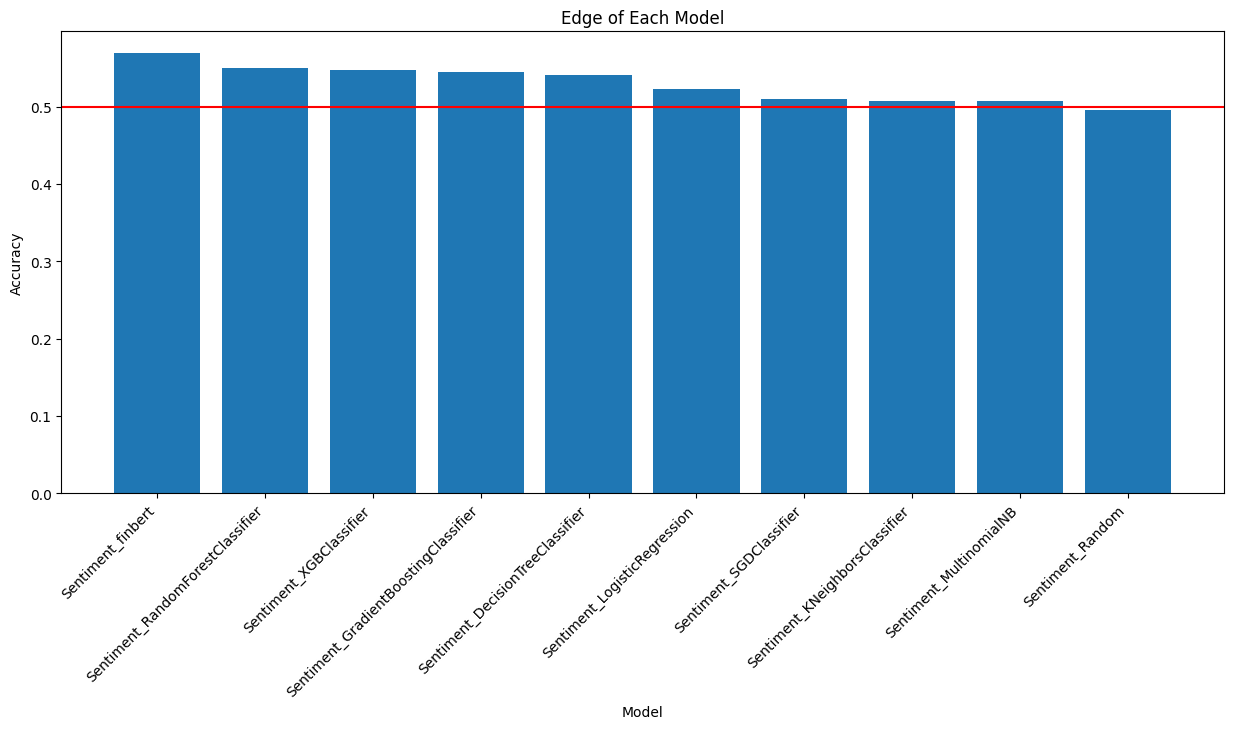

In [619]:
# Graph the accuracies
plt.figure(figsize=(15, 6))
plt.bar(edge.index, edge['Edge'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Edge of Each Model')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.axhline(y=0.5, color='r', linestyle='-')  # Add horizontal line at y=0.5

plt.savefig(f'results/{stock_name}/edge_{stock_name}.png', dpi=600, bbox_inches='tight')
plt.show()

In [620]:
edge

,Edge
Sentiment_finbert,0.568883
Sentiment_RandomForestClassifier,0.549692
Sentiment_XGBClassifier,0.547635
Sentiment_GradientBoostingClassifier,0.544894
Sentiment_DecisionTreeClassifier,0.540781
Sentiment_LogisticRegression,0.522276
Sentiment_SGDClassifier,0.509938
Sentiment_KNeighborsClassifier,0.507882
Sentiment_MultinomialNB,0.507197
Sentiment_Random,0.495068
